In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [11]:
from google.colab import files
uploaded = files.upload()

Saving NBA_season1718_salary.csv to NBA_season1718_salary (1).csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['NBA_season1718_salary.csv']))

In [15]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 4 columns):
Unnamed: 0     573 non-null int64
Player         573 non-null object
Tm             573 non-null object
season17_18    573 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 18.0+ KB


In [16]:
df.columns = ['cod', 'player', 'team', 'salary']
del df['cod']
df.head()

,player,team,salary
0,Stephen Curry,GSW,34682550.0
1,LeBron James,CLE,33285709.0
2,Paul Millsap,DEN,31269231.0
3,Gordon Hayward,BOS,29727900.0
4,Blake Griffin,DET,29512900.0


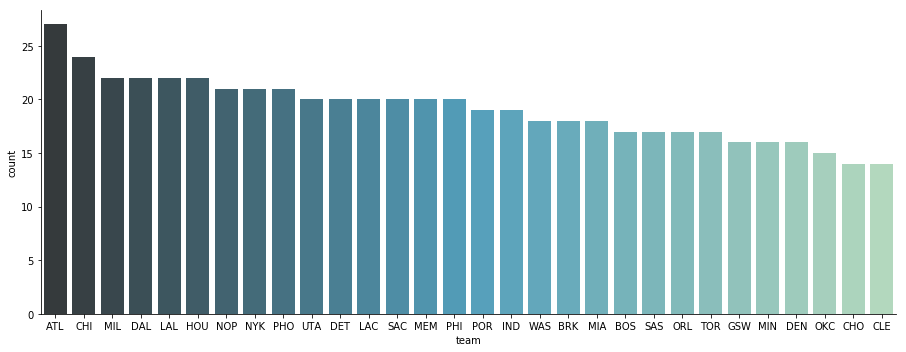

In [27]:
team_index = df['team'].value_counts()
sns.catplot(data=df,
            x='team',
            order=team_index.index,
            kind='count',
            aspect=2.5,
            palette='GnBu_d')

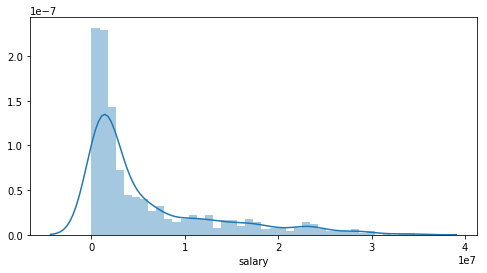

In [28]:
plt.figure(figsize=(8, 4))
sns.distplot(df['salary'], bins=40)

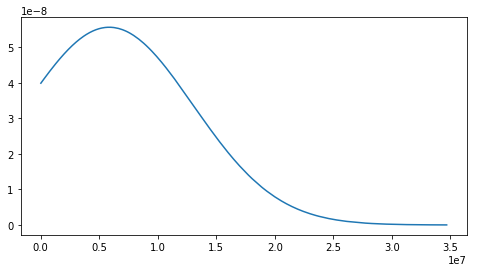

In [30]:
x = df['salary']

plt.figure(figsize=(8, 4))
plt.plot(x, st.norm.pdf(x, x.mean(), x.std()))
plt.show()

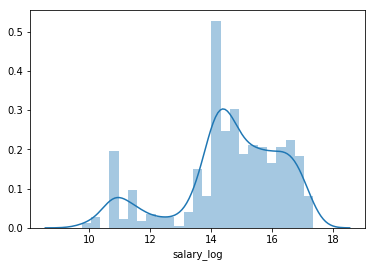

In [31]:

df['salary_log'] = np.log1p(df['salary'])
sns.distplot(df['salary_log'], bins=25)

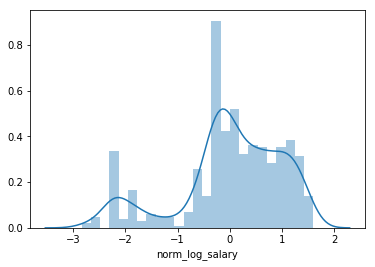

In [32]:
#標準化(standardized)
df['norm_log_salary'] = ((df['salary_log'] - df['salary_log'].mean()) / df['salary_log'].std())
sns.distplot(df['norm_log_salary'], bins=25)

In [35]:
print(f"""Mean: {df.norm_log_salary.mean():.4f}
Standard: {df.norm_log_salary.std():.4f}""")

Mean: 0.0000
Standard: 1.0000


In [36]:
norm_mean = df.norm_log_salary.mean()
norm_std = df.norm_log_salary.std()

p_value = st.norm(norm_mean, norm_std).sf(2*norm_std) * 2 #to sides
p_value

0.04550026389635878

In [37]:
z_score_inf = st.norm.interval(alpha=0.95, loc=norm_mean, scale=norm_std)[0]
z_score_sup = st.norm.interval(alpha=0.95, loc=norm_mean, scale=norm_std)[1]

print(f'{z_score_inf:.4f} <--------> {z_score_sup:.4f}')


-1.9600 <--------> 1.9600


In [38]:
df_lower = df[df['norm_log_salary'] < z_score_inf]
df_lower

,player,team,salary,salary_log,norm_log_salary
528,Demetrius Jackson,HOU,74159.0,11.213980,-1.988587
529,Georgios Papagiannis,POR,74159.0,11.213980,-1.988587
530,Larry Drew,NOP,74159.0,11.213980,-1.988587
531,Scotty Hopson,DAL,74159.0,11.213980,-1.988587
532,Isaiah Canaan,HOU,53465.0,10.886801,-2.179385
533,Tyler Cavanaugh,ATL,50000.0,10.819798,-2.218459
534,Kyle Collinsworth,DAL,50000.0,10.819798,-2.218459
535,Demetrius Jackson,HOU,50000.0,10.819798,-2.218459
536,Daniel Ochefu,WAS,50000.0,10.819798,-2.218459
537,Michael Young,WAS,50000.0,10.819798,-2.218459


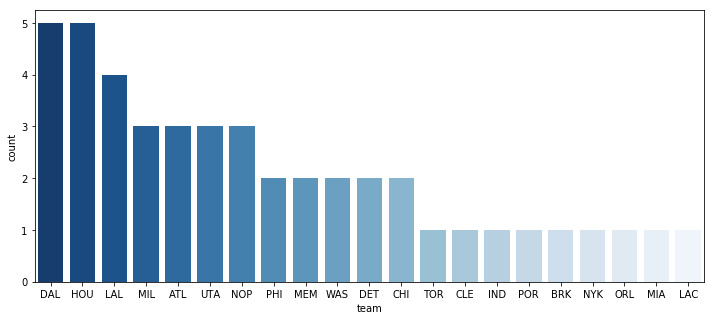

In [62]:
team_index = df_lower['team'].value_counts()
plt.figure(figsize=(12,5))
sns.countplot(df_lower['team'],
            order=team_index.index,
            palette='Blues_r')

In [84]:
df.shape[0] #找dataset列數
len(df)#同上

573

In [85]:
df_lower.shape[0]
len(df_lower)

45

In [86]:
print(f"""Players with a lower salary than the average: 
Total - {df_lower.shape[0]}
Rate - {df_lower.shape[0] / df.shape[0] * 100:.2f}%""")

Players with a lower salary than the average: 
Total - 45
Rate - 7.85%


In [87]:
df_higher = df[df['norm_log_salary'] > z_score_sup]
df_higher

,player,team,salary,salary_log,norm_log_salary


In [88]:
print(f"""Players with a higher salary than the average: 
Total - {df_higher.shape[0]}
Rate - {df_higher.shape[0] / df.shape[0] * 100:.2f}%""")

Players with a higher salary than the average: 
Total - 0
Rate - 0.00%


In [89]:
p_value = st.norm(norm_mean, norm_std).sf(df['norm_log_salary'].max())
alpha = 1 - p_value
print(f'P-value: {p_value:.3f}\nAlpha Max: {alpha:.3f}\nWe can confirm that the highest salary is on the distribution!')
#最高薪水存在在95%信心水準區間內

P-value: 0.055
Alpha Max: 0.945
We can confirm that the highest salary is on the distribution!
